In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans

%matplotlib inline

In [2]:
customer_data = pd.read_csv('./shopping-data.csv')
data = customer_data.iloc[:, 3:5]
print(customer_data)
data

     CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]


,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


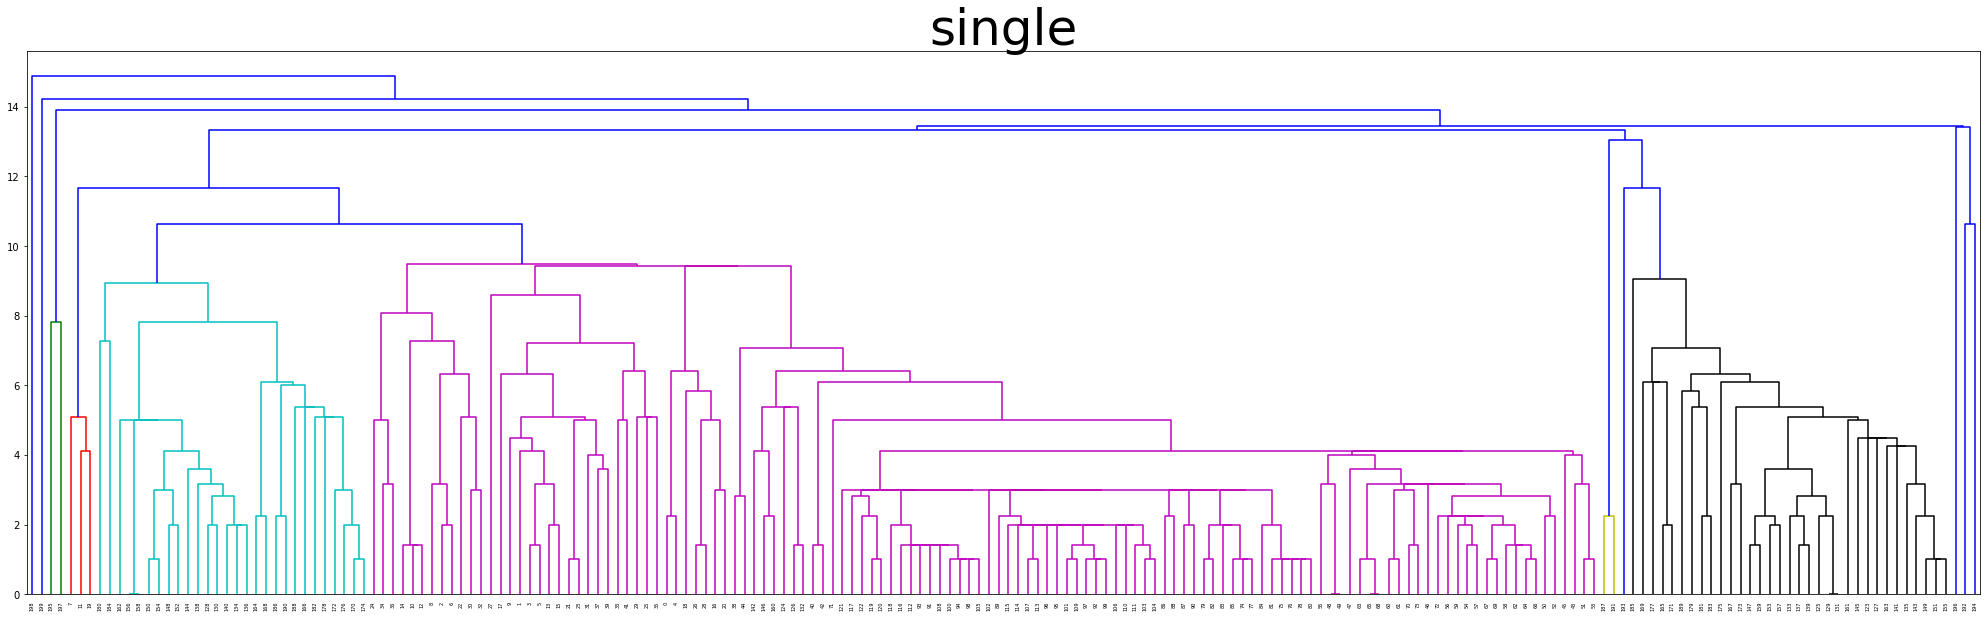

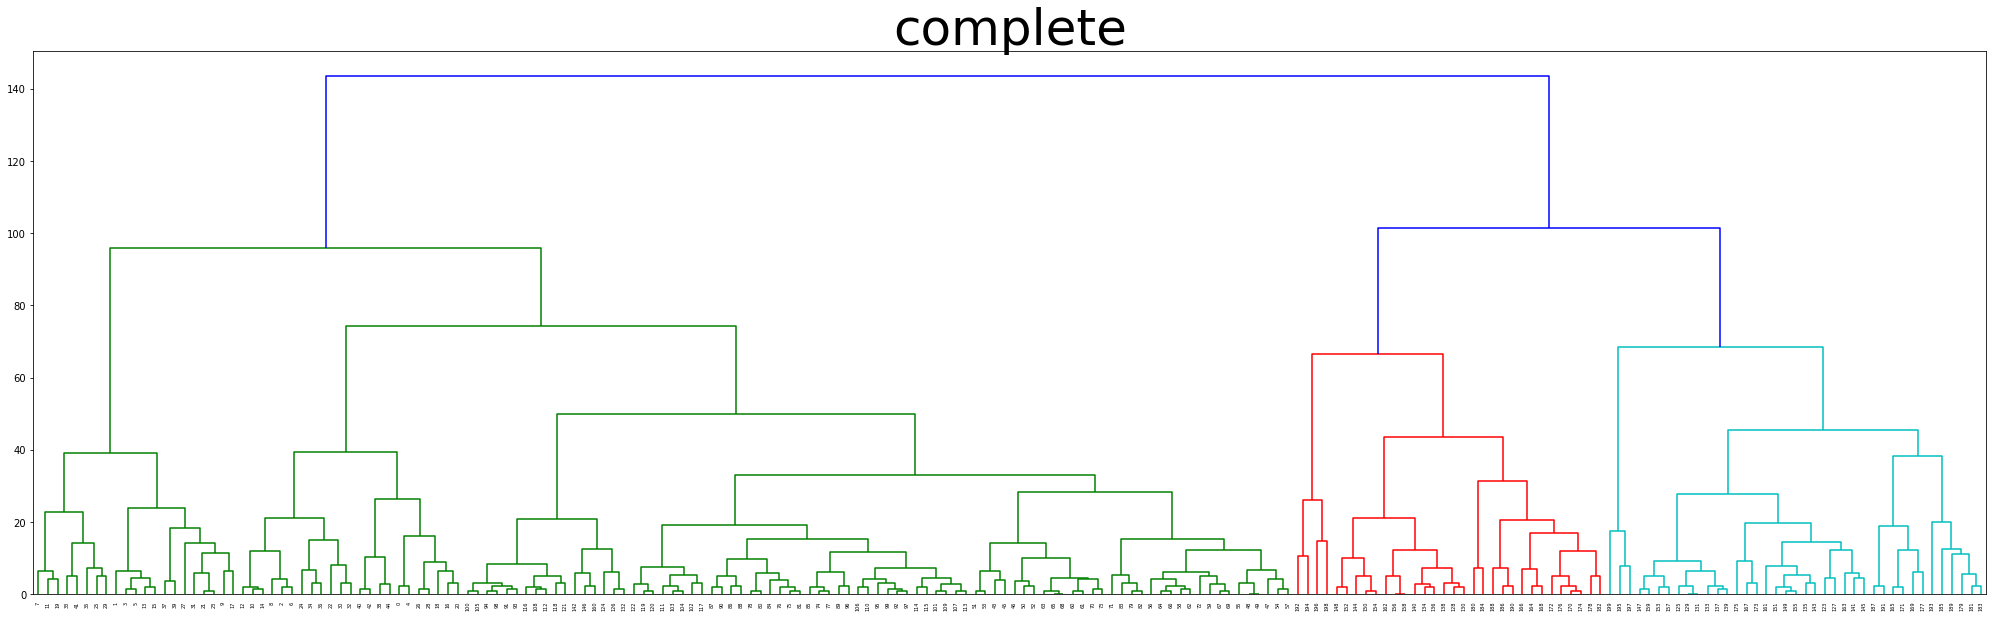

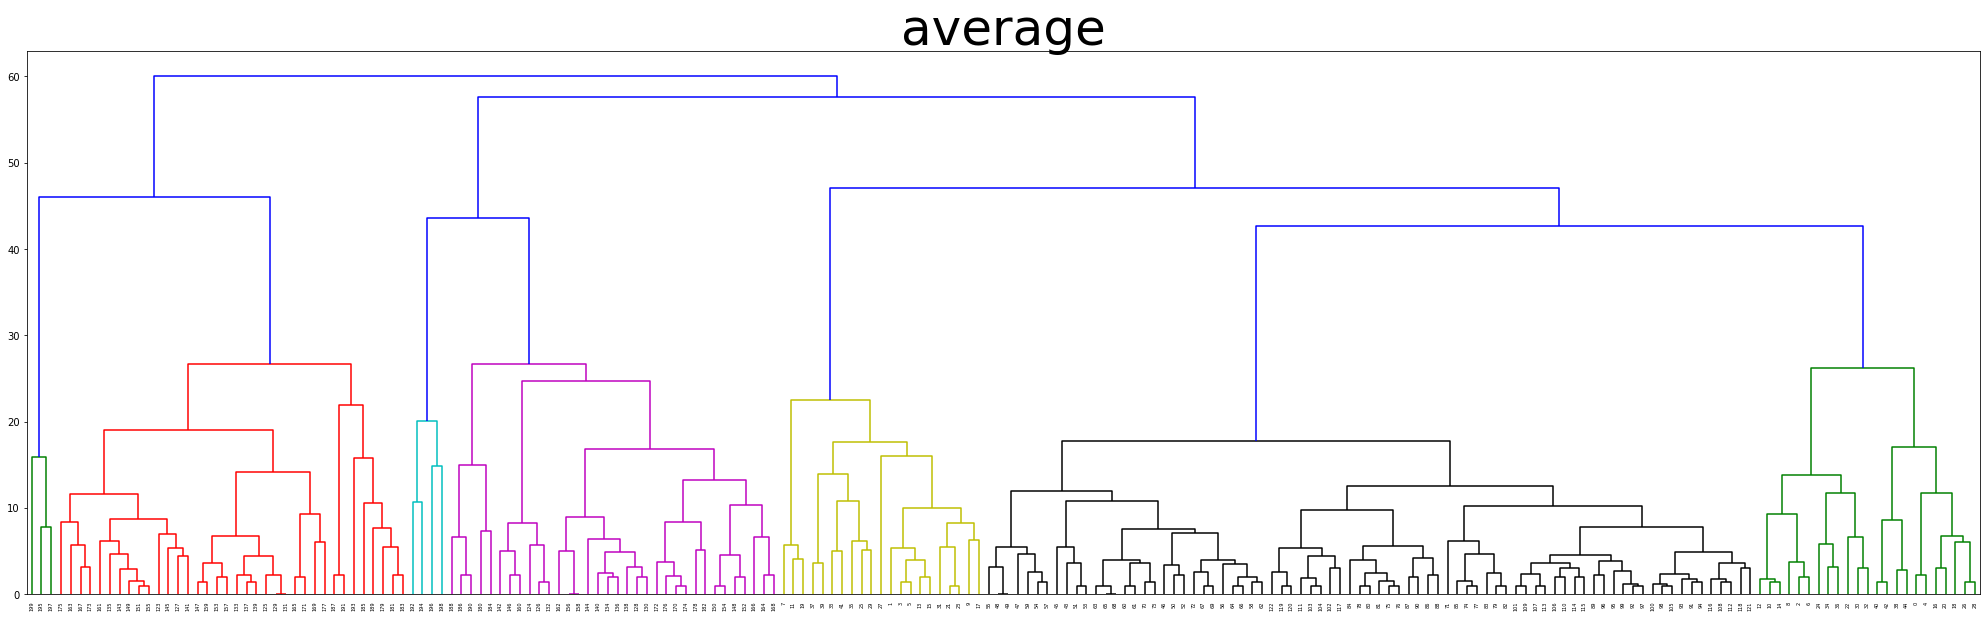

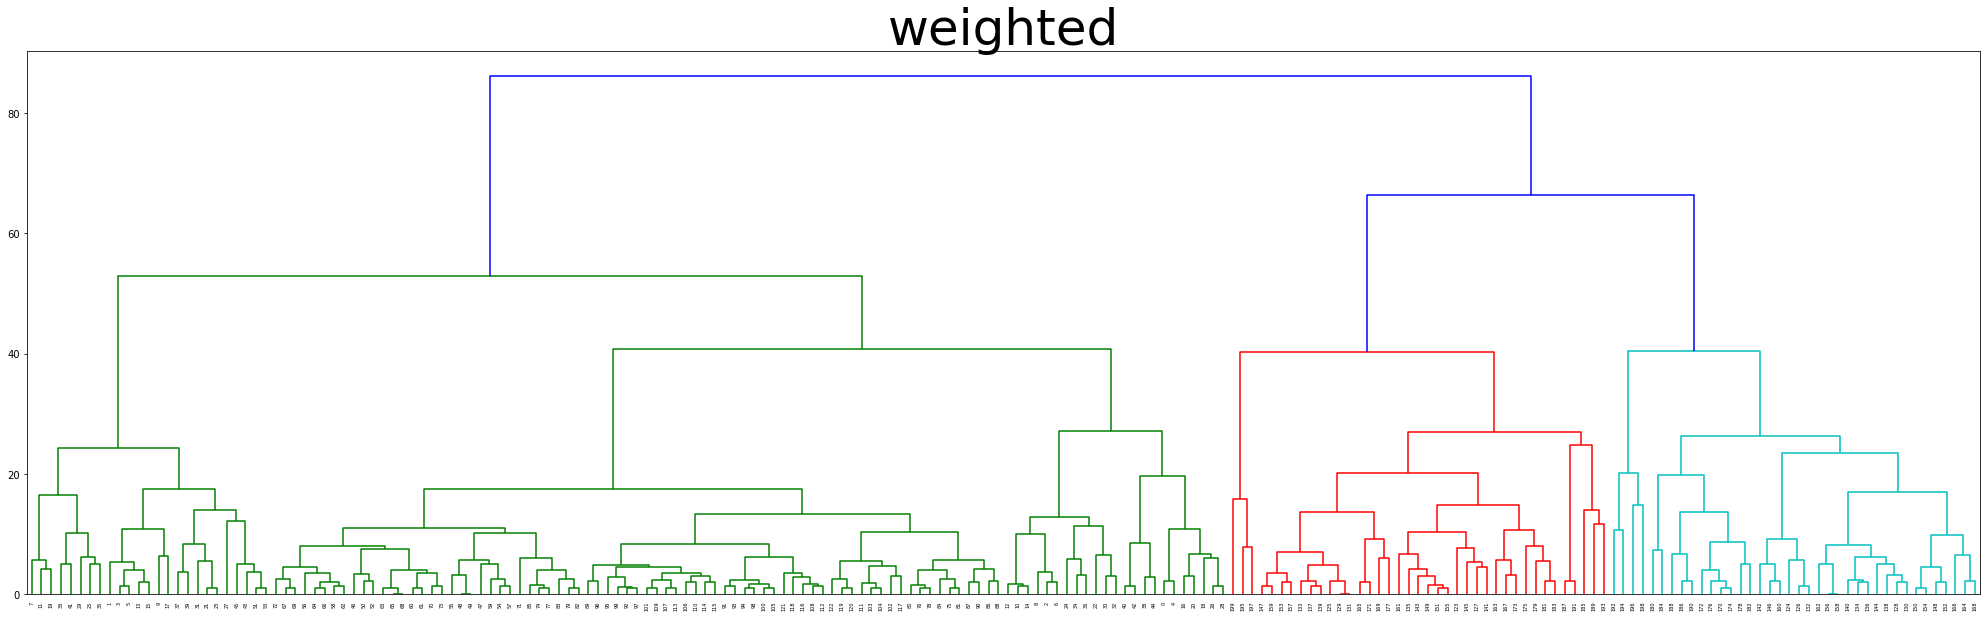

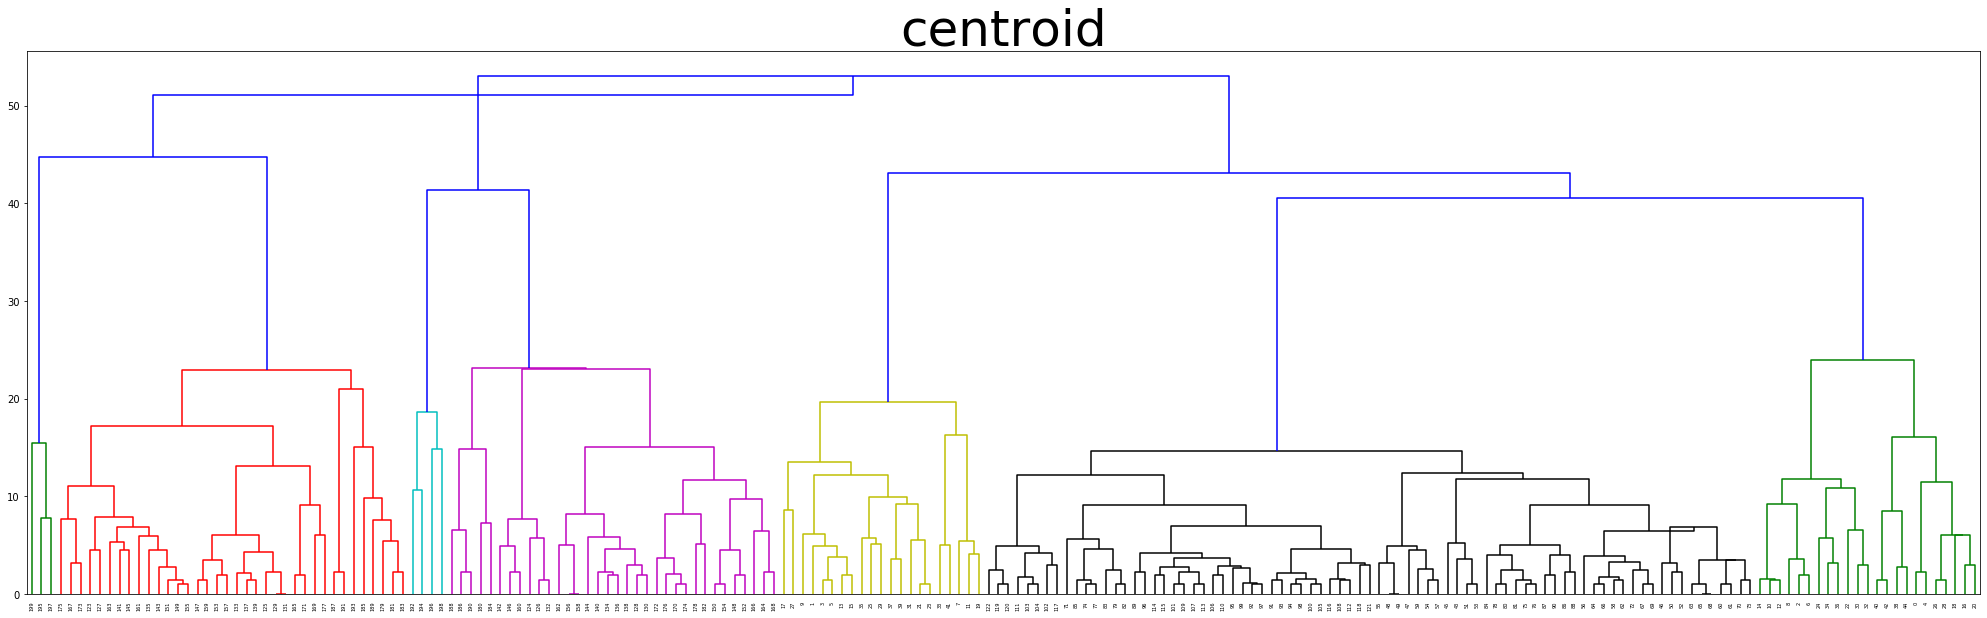

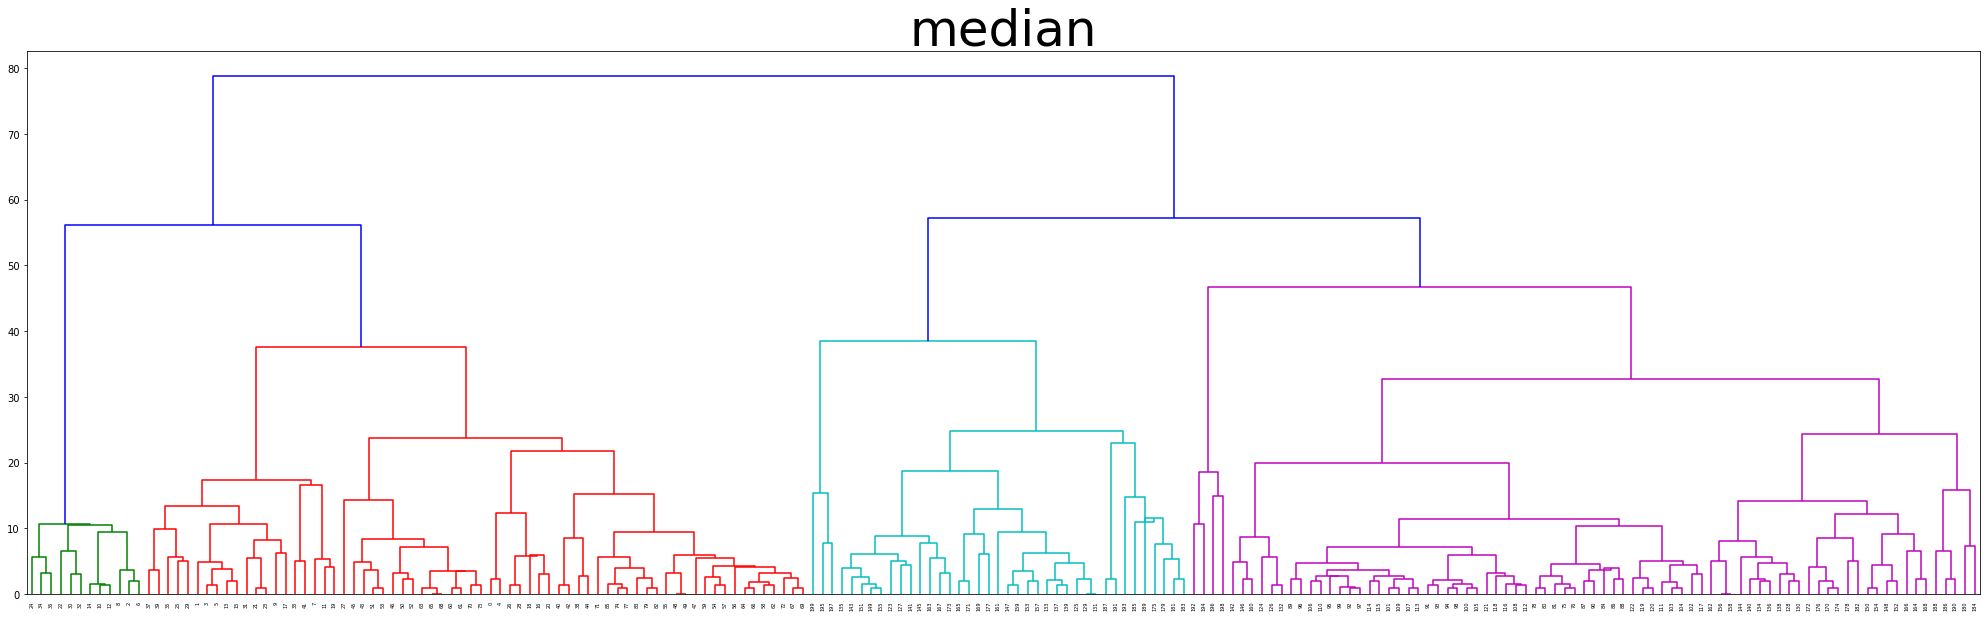

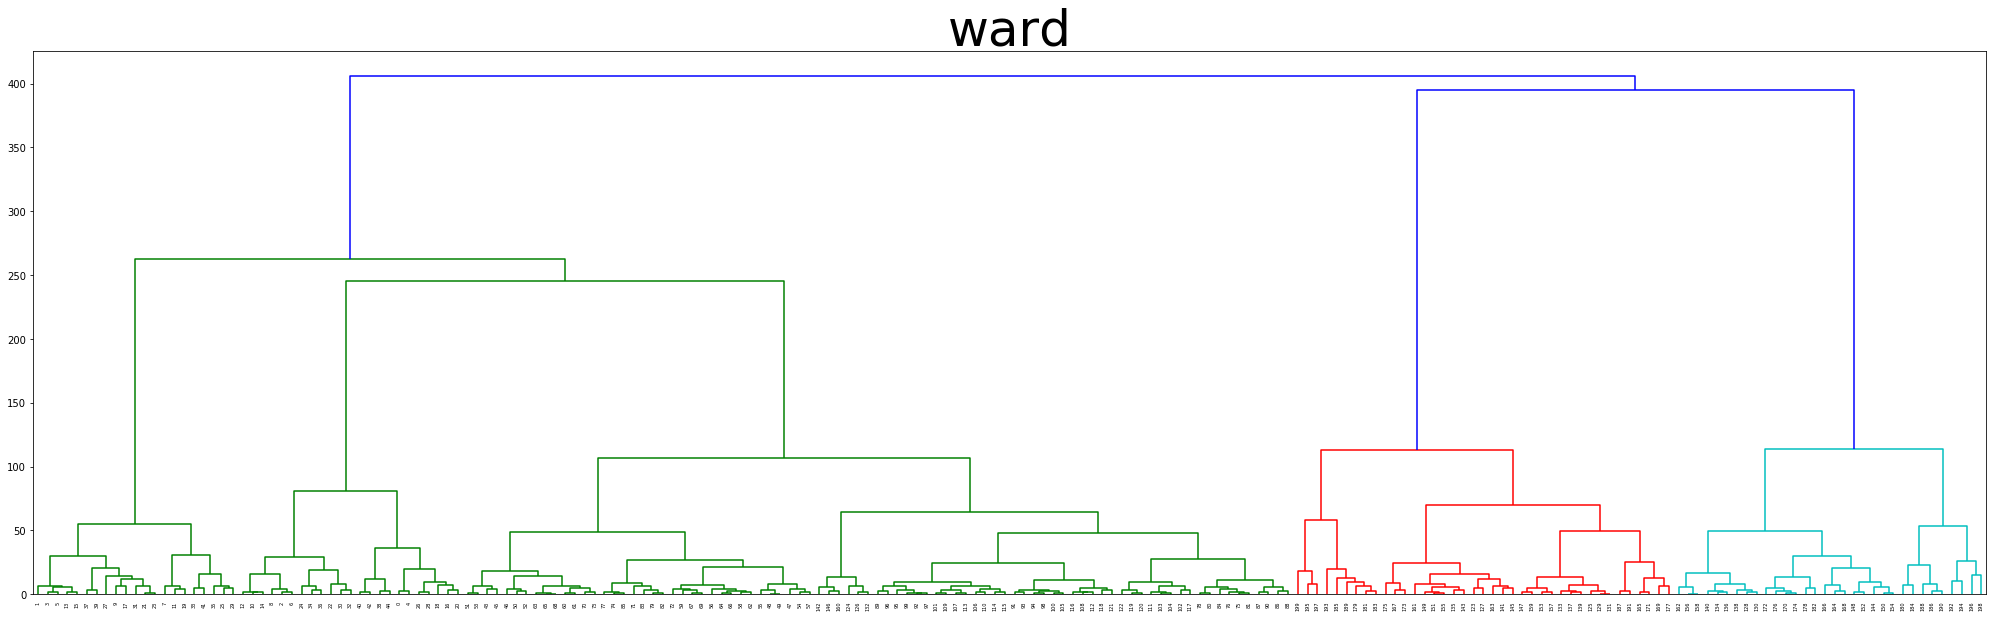

In [3]:
method_list = ["single", "complete", "average", "weighted","centroid", "median", "ward"]
for i in method_list:
    link_dist = linkage(data, metric='euclidean', method=i)  
    plt.figure(figsize=(35, 10))
    dendrogram(link_dist)
    plt.title(i, fontsize=50)
    plt.show()

In [4]:
k = KMeans(n_clusters= 5).fit(data)
print(k.n_clusters)
print(k.labels_)
print(k.inertia_) #inertia_float : Sum of squared distances of samples to their closest cluster center.

5
[4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4
 1 4 1 4 1 4 0 4 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 2 3 2 0 2 3 2 3 2 0 2 3 2 3 2 3 2 3 2 0 2 3 2 3 2
 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3
 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2]
44448.45544793369


https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

In [5]:
centers = k.cluster_centers_
centers

array([[55.2962963 , 49.51851852],
       [25.72727273, 79.36363636],
       [86.53846154, 82.12820513],
       [88.2       , 17.11428571],
       [26.30434783, 20.91304348]])

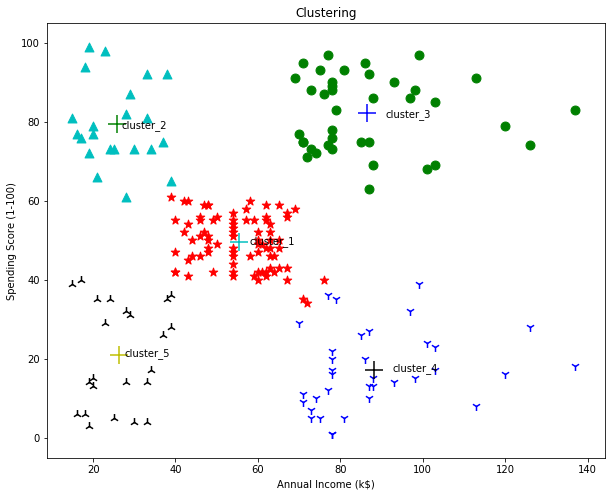

In [6]:

my_markers=['*','^', 'o','1','2']
my_color =['r','c','g','b','k','y']

plt.figure(figsize=(10, 8))
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Clustering')
name = ["cluster_1", "cluster_2", "cluster_3", "cluster_4", "cluster_5"]
h = 0
for n in range(data.shape[0]):
    label = k.labels_[n]
    plt.scatter(data['Annual Income (k$)'][n], data['Spending Score (1-100)'][n], c=my_color[label], marker=my_markers[label], s=80)
for i in range(5):
    h += 1
    plt.scatter(centers[i][0], centers[i][1], c=my_color[h], marker='+', s= 300)
    plt.text(centers[i][0]*1.05, centers[i][1]*0.99, name[i])    
    

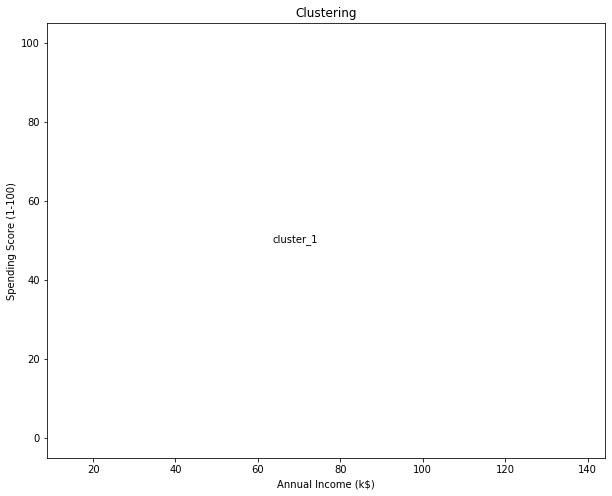

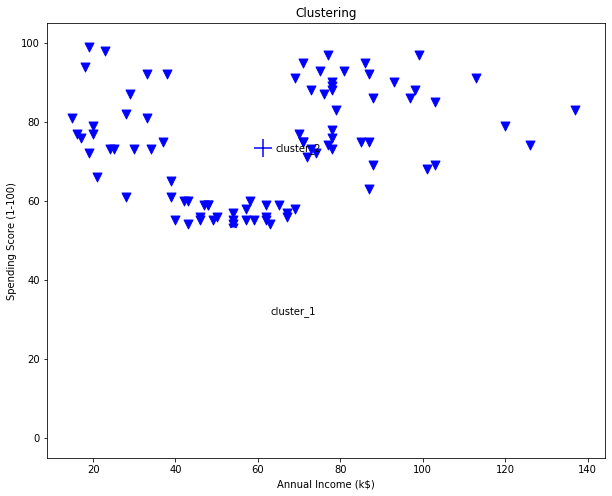

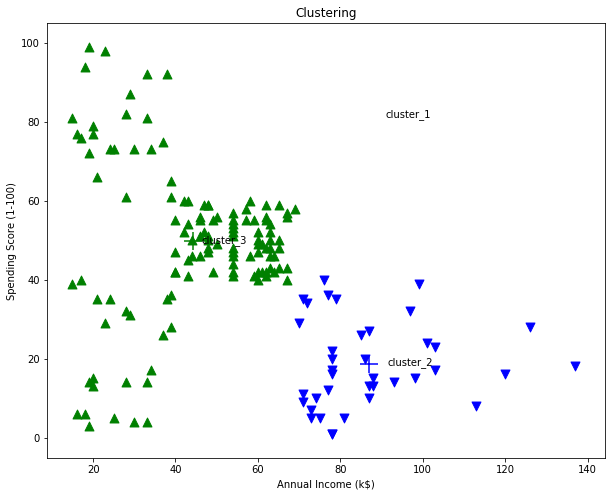

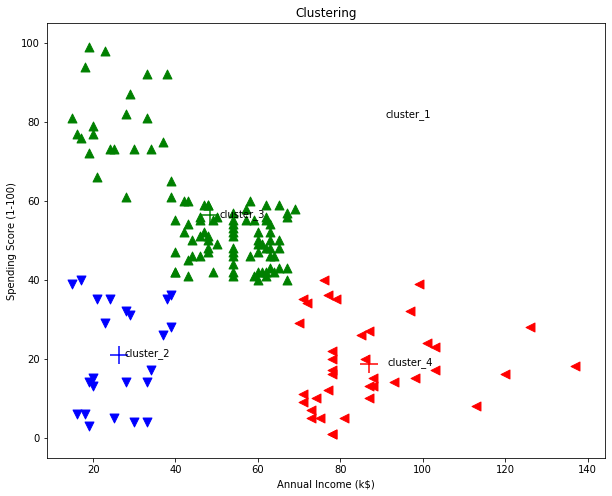

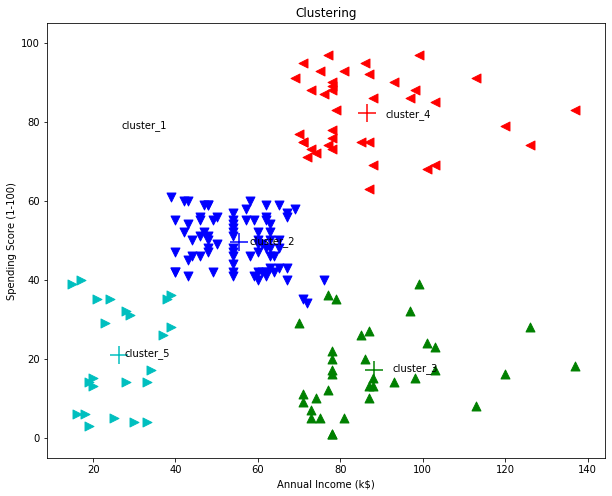

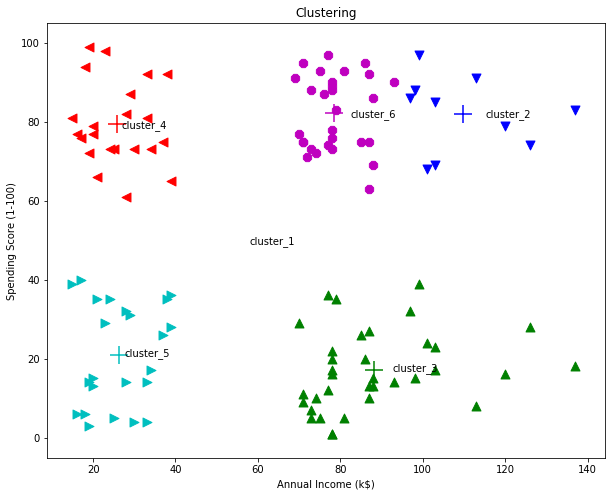

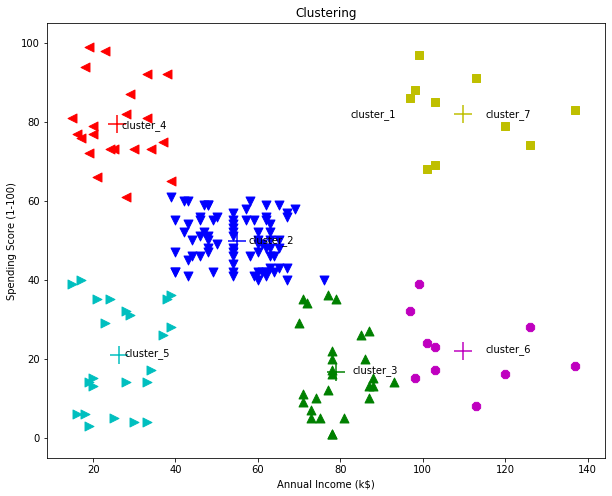

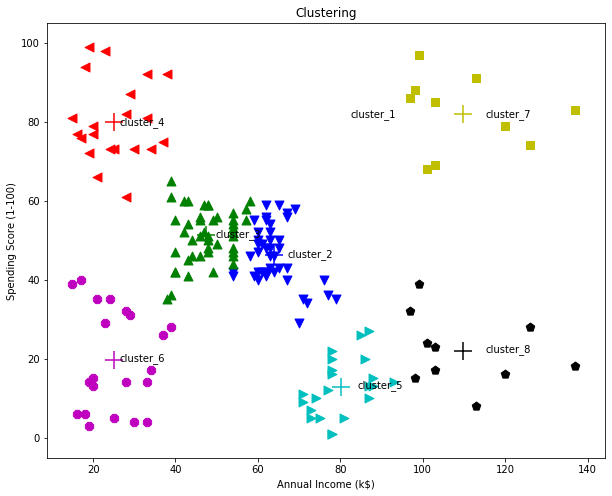

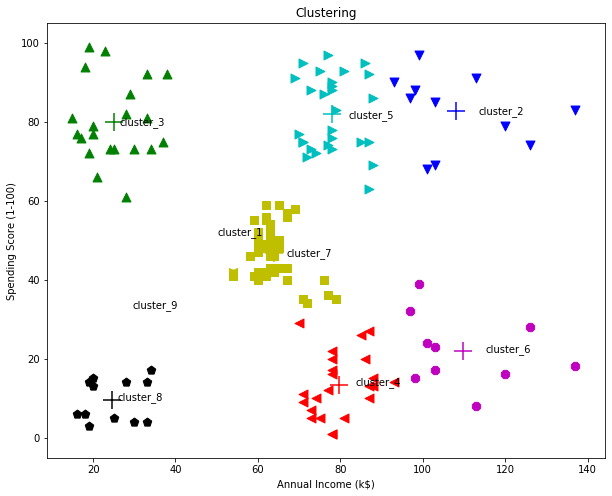

In [15]:
for z in range(1,10):
    ex = KMeans(n_clusters = z).fit(data)
    centers = ex.cluster_centers_
    #my_markers=['*','^', 'o','1','2']
    my_markers=['o', 'v', '^', '<', '>', '8', 's', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X']
    #my_color =['r','c','g','b','k','y']
    my_color = ['w',"b", "g", "r", "c", "m", "y", "k", "w"]
    plt.figure(figsize=(10, 8))
    plt.xlabel('Annual Income (k$)')
    plt.ylabel('Spending Score (1-100)')
    plt.title('Clustering')
    name = ["cluster_1", "cluster_2", "cluster_3", "cluster_4", "cluster_5", "cluster_6",
           "cluster_7", "cluster_8", "cluster_9"]
    h = 0
    for n in range(data.shape[0]):
        label = ex.labels_[n]
        plt.scatter(data['Annual Income (k$)'][n], data['Spending Score (1-100)'][n], c=my_color[label], marker=my_markers[label], s=80)
    for i in range(z):   
        plt.scatter(centers[i][0], centers[i][1], c=my_color[h], marker='+', s= 300)
        h += 1      
        plt.text(centers[i][0]*1.05, centers[i][1]*0.99, name[i])    
        